# Conversion Rate

## Goal

Optimizing conversion rate is likely the most common work of a data scientist, and rightfully so. The data revolution has a lot to do with the fact that now we are able to collect all sorts of data about people who buy something on our site as well as people who don't. This gives us a tremendous opportunity to understand what's working well (and potentially scale it even further) and what's not working well (and ﬁx it). The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve revenue.

## Challenge Description

We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site). 
Your project is to: 
- Predict conversion rate 
- Come up with recommendations for the product team and the marketing team to improve conversion rate

### Columns

* country : user country based on the IP address 
* age : user age. Self-reported at sign-in step 
* new_user : whether the user created the account during this session or had already an account and simply came back to the site 
* source : marketing channel source 
    - Ads: came to the site by clicking on an advertisement 
    - Seo: came to the site by clicking on search results 
    - Direct: came to the site by directly typing the URL on the browser 
* total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session. 
* converted: this is our label. 
    - 1 means they converted within the session, 
    - 0 means they left without buying anything. 
    
**The company goal is to increase conversion rate: conversions / total sessions.**

In [56]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Import and EDA

* import data 
* check null 
* check num columns & num of rows 
* check colnames
* check response variable 
* value_counts for all other variable

In [2]:
df = pd.read_csv('conversion_data.csv')
df.head(3)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0


In [4]:
df.info()
df.columns
#df.converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [5]:
df.country.value_counts()
#df.age.value_counts()
#df.new_user.value_counts()
#df.source.value_counts()
#df.total_pages_visited.value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

### Encode categorical variable
* Try pd.get_dummy() first (This is called *label encoding*)

* Try one hot encoding later (Optional)

In [6]:
df.converted = pd.get_dummies(df.converted,drop_first=True)


### check outlier for numerical variable (Optional)
* box plot
* 3 standard deviation method 

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plt.figure(figsize=(10,7))
#sns.boxplot(x='converted',y='total_pages_visited',data=df)

### Other feature engineering, like incorporate more features (Optional)
* age bin
* total page bin

In [76]:
rate

[0.5632258064516129,
 0.24225806451612902,
 0.1532258064516129,
 0.04129032258064516]

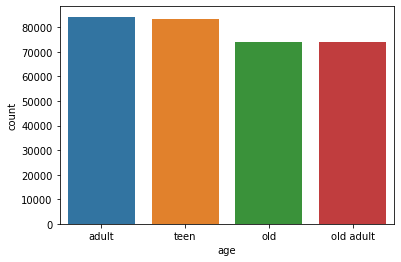

In [81]:
sns.countplot(x='age',data=df)

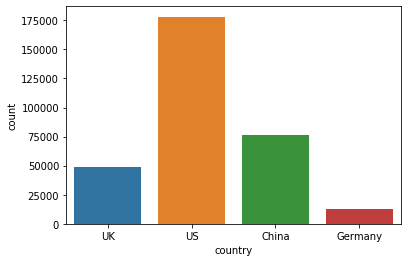

In [80]:
'''fig, ax = plt.barplots(nrows=2, figsize=(12,8))

lst = [178092,76602,48450,13056]
county = ['US','China','UK','Germenay']
# Plot the distribution
sns.barplot(x=county,y=lst, ax=ax[0], color='r')
'''
sns.countplot(x='country',data=df)


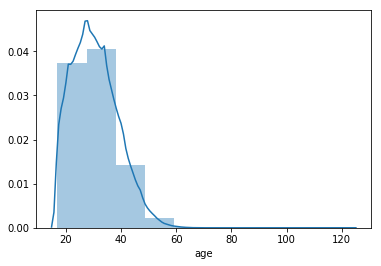

In [11]:
sns.distplot(df['age'],bins=10)

In [15]:
'''
def bin(x):
        if x <= 20:
            return 1
        elif x >20 and x<=40:
            return 2
        elif x >40 and x <= 60:
            return 3
        else:
            return 4
        
#df.age = df.age.apply(bin)

#df.age.value_counts()
'''

2    240552
3     39843
1     35568
4       237
Name: age, dtype: int64

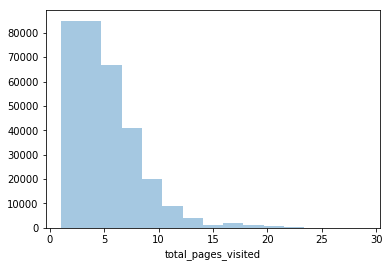

In [12]:
sns.distplot(df['total_pages_visited'], kde=False,bins=15)

In [17]:
'''

def binbin(x):
        if x <= 5:
            return 1
        elif x >5 and x<=10:
            return 2
        elif x >10 and x <= 15:
            return 3
        else:
            return 4
        
#df['total_pages_visited'] = df['total_pages_visited'].apply(binbin)

#df['total_pages_visited'].value_counts()
'''

1    205790
2     91502
3     14570
4      4338
Name: total_pages_visited, dtype: int64

In [13]:
def jas(x):
    if x == 'Seo':
        return 1
    elif x=='Ads':
        return 2
    else:
        return 3

df.source = df.source.apply(jas)

In [14]:
def country(x):
    if x == 'US':
        return 1
    elif x=='China':
        return 2
    elif x=='UK':
        return 3
    else:
        return 4

df.country = df.country.apply(country)

In [15]:
df.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [18]:
df

,country,age,new_user,source,total_pages_visited,converted
0,3,25,1,2,1,0
1,1,23,1,1,5,0
2,1,28,1,1,4,0
3,2,39,1,1,5,0
4,1,30,1,1,6,0
...,...,...,...,...,...,...
316195,1,26,1,2,9,0
316196,1,27,1,3,6,0
316197,2,25,0,2,4,0
316198,1,22,0,1,4,0


# Train-validation-test split 

### split your data in 70/30 train/test, validation set is built while you are fitting models

In [28]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[['country','age','new_user','source','total_pages_visited']]
y=df['converted']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
train_df=pd.concat([X_train,y_train],axis=1)
test_df=pd.concat([X_test,y_test],axis=1)

In [219]:
train_df

,country,age,new_user,source,total_pages_visited,converted
173253,1,28,1,2,6,0
166776,1,29,0,2,2,0
29417,1,35,0,1,4,0
273142,1,25,0,1,1,0
19929,3,24,0,2,3,0
192081,1,19,1,1,5,0
199197,1,19,0,2,4,0
274097,1,19,1,3,4,0
19357,3,45,1,1,1,0
166979,1,37,0,1,3,0


In [22]:

sample = train_df[train_df.converted ==0]
sample1=train_df[train_df.converted ==1]
        


In [24]:
new=sample.sample(n=7211)
new.head(3)
newdf=pd.concat(objs=[new,sample1]).reset_index()
newdf.head(3)
len(newdf)
df2 = newdf.sample(frac=1)
df2.drop('index',axis=1,inplace=True)

In [224]:
df2.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [25]:
X_train=df2[df2.columns[:5]]

In [26]:
y_train=df2.converted


# Model building
* **Use 5 fold validation method and take average metric for each method**
* **Choose the appropriate metrics while fitting models, egs: roc_auc, recall, accuracy, precision, f_score, etc**

### 1. Logistic regression model

### 2. Classification Tree model

### 3. random forest 

### 4. gradient boosting tree

In [52]:
from sklearn import metrics
from statistics import mean 

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [31]:
# logistic
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
# validation
kmean_lr = mean(cross_val_score(log,X_train,y_train,cv=5,scoring='accuracy'))
print(kmean_lr)
# test 
log.fit(X_train,y_train)
pred = log.predict(X_test)
print('Test report')
print(classification_report(y_test,pred),confusion_matrix(y_test,pred))


0.934475153659586
Test report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     91871
           1       0.32      0.93      0.48      2989

    accuracy                           0.94     94860
   macro avg       0.66      0.93      0.72     94860
weighted avg       0.98      0.94      0.95     94860
 [[85944  5927]
 [  201  2788]]


In [32]:
# tree
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
# validation
kmean_tree = mean(cross_val_score(tree,X_train,y_train,cv=5,scoring='accuracy'))
print(kmean_tree)

# test 
tree.fit(X_train,y_train)
pred = tree.predict(X_test)
print('test report')
print(classification_report(y_test,pred),confusion_matrix(y_test,pred))


0.9157537312177146
test report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     91871
           1       0.30      0.91      0.46      2989

    accuracy                           0.93     94860
   macro avg       0.65      0.92      0.71     94860
weighted avg       0.97      0.93      0.95     94860
 [[85693  6178]
 [  282  2707]]


In [33]:
# rf
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=20 ,n_jobs=-1)
# validation
kmean_rf = mean(cross_val_score(rf,X_train,y_train,cv=5,scoring='accuracy'))
print(kmean_rf)
# test
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print('test report')
print(classification_report(y_test,pred),confusion_matrix(y_test,pred))


0.9260161483785518
test report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     91871
           1       0.29      0.93      0.45      2989

    accuracy                           0.93     94860
   macro avg       0.65      0.93      0.70     94860
weighted avg       0.98      0.93      0.94     94860
 [[85159  6712]
 [  202  2787]]


In [36]:
# boost
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier()
# validation
kmean_boost = mean(cross_val_score(boost,X_train,y_train,cv=5,scoring='accuracy'))
print(kmean_boost)
# test 
boost.fit(X_train,y_train)
pred = boost.predict(X_test)
print('test report')
print(classification_report(y_test,pred),confusion_matrix(y_test,pred))
print(roc_auc_score(y_test,pred))

0.9421721468113082
test report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     91871
           1       0.33      0.94      0.49      2989

    accuracy                           0.94     94860
   macro avg       0.66      0.94      0.73     94860
weighted avg       0.98      0.94      0.95     94860
 [[86150  5721]
 [  177  2812]]
0.939255385801973


In [237]:
pd.Series(pred).value_counts()

0    86767
1     8093
dtype: int64

# Model tunning
* Tune your best validation model
* Try to tune logistic regression model

In [198]:
kmeans = [kmean_lr,kmean_tree,kmean_rf,kmean_boost]
print(max(kmeans))


0.9420170707292276


In [202]:
name_list=['logitstic regression','tree','rf','boost']
decision=dict(zip(name_list,kmeans))
decision

{'logitstic regression': 0.935784871366435,
 'tree': 0.917226882737633,
 'rf': 0.9272399085340071,
 'boost': 0.9420170707292276}

looks like gradient boosting has the highest cross val score in accurcay 

# Model Report 
* feature importance rate 

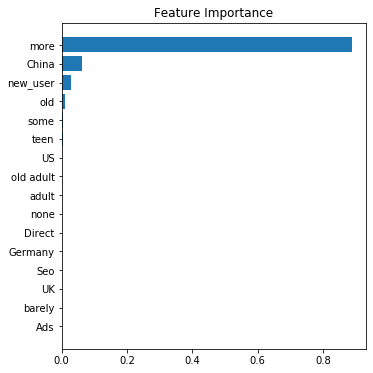

In [58]:
feature_importance = boost.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

plt.show()

In [243]:
# conversion rate
8093/(86767+8093)

0.08531520134935695

8.5% of the user will eventually convert and it's mainly depends on total webpage visited

## start from the original df, use one hot encoding to do more analysis 
* age bin
* page_bin

use numpy.quantile to check 0.25,0.5,0.75 percentile 

In [3]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [5]:
np.quantile(df.age,0.25)

24.0

In [6]:
np.quantile(df.age,0.5)

30.0

In [7]:
np.quantile(df.age,0.75)

36.0

In [11]:
countries = pd.get_dummies(df.country)
countries

,China,Germany,UK,US
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
5,0,0,0,1
6,1,0,0,0
7,0,0,0,1
8,0,0,1,0
9,0,0,0,1


In [12]:
sources = pd.get_dummies(df.source)
sources

,Ads,Direct,Seo
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [13]:
def bin(x):
        if x <= 24:
            return 'teen'
        elif x >24 and x<=30:
            return 'adult'
        elif x >30 and x <= 36:
            return 'old adult'
        else:
            return 'old'
        
df.age = df.age.apply(bin)

ages = pd.get_dummies(df.age)
ages

,adult,old,old adult,teen
0,1,0,0,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,0,0,1
8,1,0,0,0
9,1,0,0,0


In [14]:
np.quantile(df['total_pages_visited'],0.25)

2.0

In [17]:
np.quantile(df['total_pages_visited'],0.5)

4.0

In [18]:
np.quantile(df['total_pages_visited'],0.75)

7.0

In [19]:
def binbin(x):
        if x <= 2:
            return 'none'
        elif x >2 and x<=4:
            return 'barely'
        elif x >4 and x <= 7:
            return 'some'
        else:
            return 'more'
        
df['total_pages_visited'] = df['total_pages_visited'].apply(binbin)

#df['total_pages_visited'].value_counts()

pages = pd.get_dummies(df['total_pages_visited'])
pages

,barely,more,none,some
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,0,1,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,1,0


In [25]:
new_df=pd.concat([df,countries,sources,ages,pages],axis=1)
new_df
new_df.drop(['country','age','source','total_pages_visited'],axis=1,inplace=True)
new_df.head()

,new_user,converted,China,Germany,UK,US,Ads,Direct,Seo,adult,old,old adult,teen,barely,more,none,some
0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1


In [33]:
X = new_df.drop('converted',axis=1)
y=new_df['converted']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
train_df=pd.concat([X_train,y_train],axis=1)
test_df=pd.concat([X_test,y_test],axis=1)

In [35]:
train_df

,new_user,China,Germany,UK,US,Ads,Direct,Seo,adult,old,old adult,teen,barely,more,none,some,converted
173253,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0
166776,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
29417,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
273142,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0
19929,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
192081,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
199197,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
274097,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0
19357,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
166979,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [37]:
sample = new_df[new_df.converted==1]
len(sample)

10200

In [40]:
sample1 =new_df[new_df.converted==0]
new_sample1=sample1.sample(10200)

In [48]:
new_df1 = pd.concat([sample,new_sample1]).reset_index()
new_df2 = new_df1.sample(frac=1)
new_df2.drop('index',axis=1,inplace=True)
new_df2


,new_user,converted,China,Germany,UK,US,Ads,Direct,Seo,adult,old,old adult,teen,barely,more,none,some
1245,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
19417,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
10887,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
9529,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
9508,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
13426,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
19965,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
19404,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1962,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0
19446,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [50]:
X_train=new_df2.drop('converted',axis=1)
y_train=new_df2.converted

In [54]:
# boost
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier()
# validation
kmean_boost = mean(cross_val_score(boost,X_train,y_train,cv=5,scoring='accuracy'))
print(kmean_boost)
# test 
boost.fit(X_train,y_train)
pred = boost.predict(X_test)
print('test report')
print(classification_report(y_test,pred),confusion_matrix(y_test,pred))
print(roc_auc_score(y_test,pred))

0.9177941176470588
test report
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     91871
           1       0.21      0.96      0.35      2989

    accuracy                           0.89     94860
   macro avg       0.61      0.92      0.64     94860
weighted avg       0.97      0.89      0.92     94860
 [[81346 10525]
 [  134  2855]]
0.9203030709645714


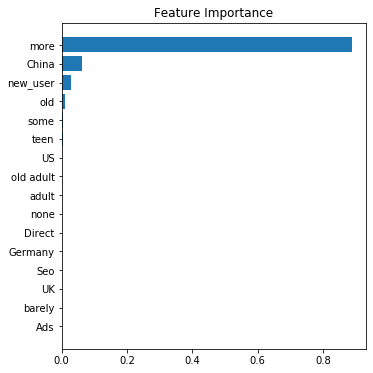

In [59]:
feature_importance = boost.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

plt.show()

I suggest that the company should focus on Chinese market who tends to visit multiple web pages.